In [59]:
from csv import reader
import pandas as pd
import matplotlib.pyplot as plt

covid = pd.read_csv("/Users/zachpolitz/Desktop/Conditions_Contributing_to_COVID-19_Deaths__by_State_and_Age__Provisional_2020-2021.csv")
headers = covid.columns
c_info = covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285660 entries, 0 to 285659
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Data As Of          285660 non-null  object 
 1   Start Date          285660 non-null  object 
 2   End Date            285660 non-null  object 
 3   Group               285660 non-null  object 
 4   Year                273240 non-null  float64
 5   Month               248400 non-null  float64
 6   State               285660 non-null  object 
 7   Condition Group     285660 non-null  object 
 8   Condition           285660 non-null  object 
 9   ICD10_codes         285660 non-null  object 
 10  Age Group           285660 non-null  object 
 11  COVID-19 Deaths     207662 non-null  float64
 12  Number of Mentions  209866 non-null  float64
 13  Flag                77998 non-null   object 
dtypes: float64(4), object(10)
memory usage: 30.5+ MB


Intention: Patterns of Exploration
Bring something back to the real world. Practice visualizations. Go beyond nationwide analysis

Are these data trustworthy? Where are these data vulnerable? 
        Do I know what each column is about?
            - ICD10 and Conditions
            - Condition Group
            - Number of Mentions
            - Start Date/End Date
        Where are the gaps in reporting? 
            - Null proportions: stacked bar chart   
                age groups
                conditions
                by state 
                by year
                by month
        Nationwide counts versus sum of states: 
            - Table 
        Reporting methodology: 
            - Condition:Age_Group profile by state
                horizontal stacked bar (x:conds_stacked y:age)
            - Does an individual death with multiple associated conditions get counted multiple times; 
              Does a given death only get associated with one condition?
            
   ^^ What would it take to complete this analysis in one day?

In [60]:
dict_column_series = {}
for row in headers:
    dict_column_series[row] = covid[row]

In [ ]:
twenty_year = covid[ (covid["Year"] == 2020)&(covid['Group'] == 'By Year') ].copy()
twentyone_year = covid.loc[ (covid["Year"] == 2021)&(covid['Group'] == 'By Year') ].copy()
twenty_month = covid.loc[ (covid["Year"] == 2020)&(covid['Group'] == 'By Month') ].copy()
twentyone_month = covid.loc[ (covid["Year"] == 2021)&(covid['Group'] == 'By Month') ].copy()


twenty_year.info()
print('\n')
twentyone_year.info()
print('\n')
twenty_month.info()
print('\n')
twentyone_month.info()

Plot null count across year and group type.

[0.2144122383252818, 0.22930756843800323, 0.24917471819645734, 0.3326388888888889]
[12420, 12420, 149040, 99360]
[2663, 2848, 37137, 33051]


<ipython-input-103-a782025a036d>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(graph_labels)


[Text(0, 0, 'twenty_year: .214'),
 Text(1, 0, 'twentyone_year: .229'),
 Text(2, 0, 'twenty_month: .249'),
 Text(3, 0, 'twentyone_month: .333')]

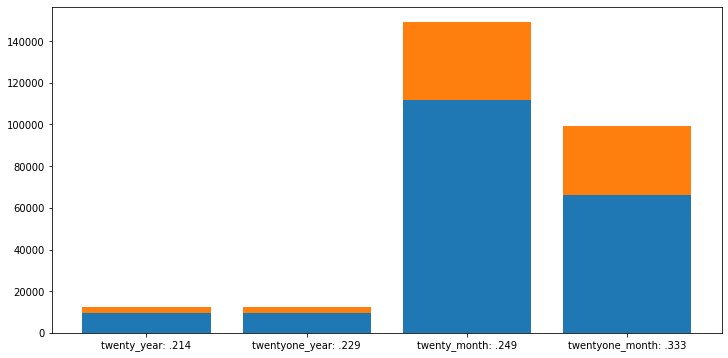

In [103]:
fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize = (12,6))
set = {'twenty_year':[12420,(12420-9757)], 
        'twentyone_year':[12420,(12420-9572)], 
        'twenty_month':[149040,(149040-111903)], 
        'twentyone_month':[99360,(99360-66309)]}

s_labels = ['twenty_year', 'twentyone_year', 'twenty_month', 'twentyone_month']

s_base = []
s_top = []
s_range = []

proportion = []
for row in s_labels:
    x = set[row]
    s_base.append(x[0])
    s_top.append(x[1])
    s_range.append(x[0]-x[1])
    proportion.append(x[1]/x[0])
    
print(proportion)
print(s_base)    
print(s_top)


graph_labels = ['twenty_year: .214', 'twentyone_year: .229', 'twenty_month: .249', 'twentyone_month: .333']

ax.bar(x=s_labels, height = s_base)
ax.bar(x=s_labels, height = s_top, bottom = (s_range))
ax.set_xticklabels(graph_labels)

Compare 'United States' death count versus the sum of each state's counts.

['20_annual', '21_annual', '20_month', '21_month']
[2858166.0, 1830096.0, 2858166.0, 1830096.0, 2860933.0, 1827201.0, 2748782.0, 1731353.0]


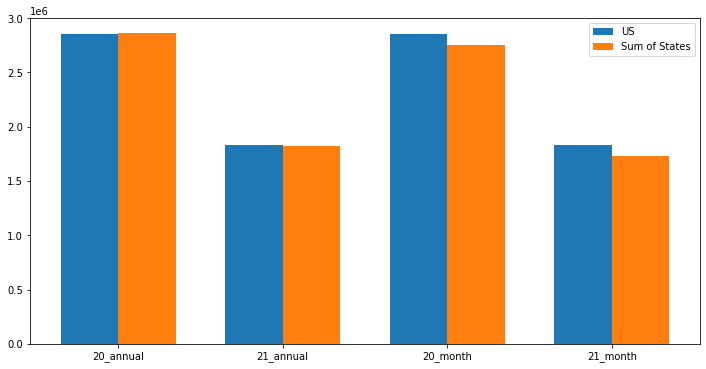

In [98]:
US20_annual = twenty_year[twenty_year['State'] == 'United States'].copy()

US21_annual = twentyone_year[twentyone_year['State'] == 'United States'].copy()
US20_month = twenty_month[twenty_month['State'] == 'United States'].copy()
US21_month = twentyone_month[twentyone_month['State'] == 'United States'].copy()

sum20_annual = twenty_year[twenty_year['State'] != 'United States'].copy()
sum21_annual = twentyone_year[twentyone_year['State'] != 'United States'].copy()
sum20_month = twenty_month[twenty_month['State'] != 'United States'].copy()
sum21_month = twentyone_month[twentyone_month['State'] != 'United States'].copy()

labels = ['20_annual', '21_annual','20_month', '21_month']

US_deaths = [US20_annual['COVID-19 Deaths'].sum(), 
          US21_annual['COVID-19 Deaths'].sum(),
          US20_month['COVID-19 Deaths'].sum(),
          US21_month['COVID-19 Deaths'].sum()]
sum_deaths = [sum20_annual['COVID-19 Deaths'].sum(),
          sum21_annual['COVID-19 Deaths'].sum(),
          sum20_month['COVID-19 Deaths'].sum(),
          sum21_month['COVID-19 Deaths'].sum()]

fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize = (12,6))
ax.bar(x = labels, height = US_deaths, width = -.35, align = 'edge', label = 'US')
ax.bar(x = labels, height = sum_deaths, width = .35, align = 'edge', label = 'Sum of States')
ax.legend()

print(labels)
print(deaths)
# side-by-side bar charts
# isolate deaths